## Least Square

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

%matplotlib ipympl

In [2]:
df = pd.read_csv('./q2_dataset.csv')
df

,x1,x2,y
0,1.6,851,293
1,15.5,816,230
2,22.0,1058,172
3,43.0,1201,91
4,33.0,1357,113
5,40.0,1115,125


In [3]:
X = df[['x1', 'x2']].to_numpy()
y = df['y'].to_numpy()

X = df[['x1', 'x2']].to_numpy()
y = df['y'].to_numpy()

# Add a column of ones to X to represent the intercept
X_with_intercept = np.hstack([X, np.ones((X.shape[0], 1))])

In [4]:
X_with_intercept.shape

(6, 3)

In [5]:
a_1, b_1, c_1 = np.linalg.lstsq(X_with_intercept, y, rcond=None)[0]
print(a_1, b_1, c_1)

-3.63808834107148 -0.11168156764360371 383.8010285806606


In [6]:
y_pred_lstsq = a_1 * X[:, 0] + b_1 * X[:, 1] + c_1
y_pred_lstsq

array([282.93907317, 236.2785001 , 185.60398651,  93.23366717,
       112.19222603, 113.75254702])

In [7]:
r2_score = 1 - np.sum((y-y_pred_lstsq)**2)/np.sum((y-np.mean(y))**2)
r2_score

0.9848618885255066

## Linear Regression

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [9]:
linear_reg = LinearRegression()
linear_reg.fit(X, y)

LinearRegression()

In [10]:
a_2, b_2, c_2 = *linear_reg.coef_, linear_reg.intercept_

In [11]:
y_pred_linreg = linear_reg.predict(X)

In [12]:
r2_score(y, y_pred_linreg)

0.9848618885255066

In [13]:
x1_range = np.linspace(X[:, 0].min(), X[:, 0].max(), 10)
x2_range = np.linspace(X[:, 1].min(), X[:, 1].max(), 10)

x1_mesh, x2_mesh = np.meshgrid(x1_range, x2_range)
y_mesh = a_2 * x1_mesh + b_2 * x2_mesh + c_2

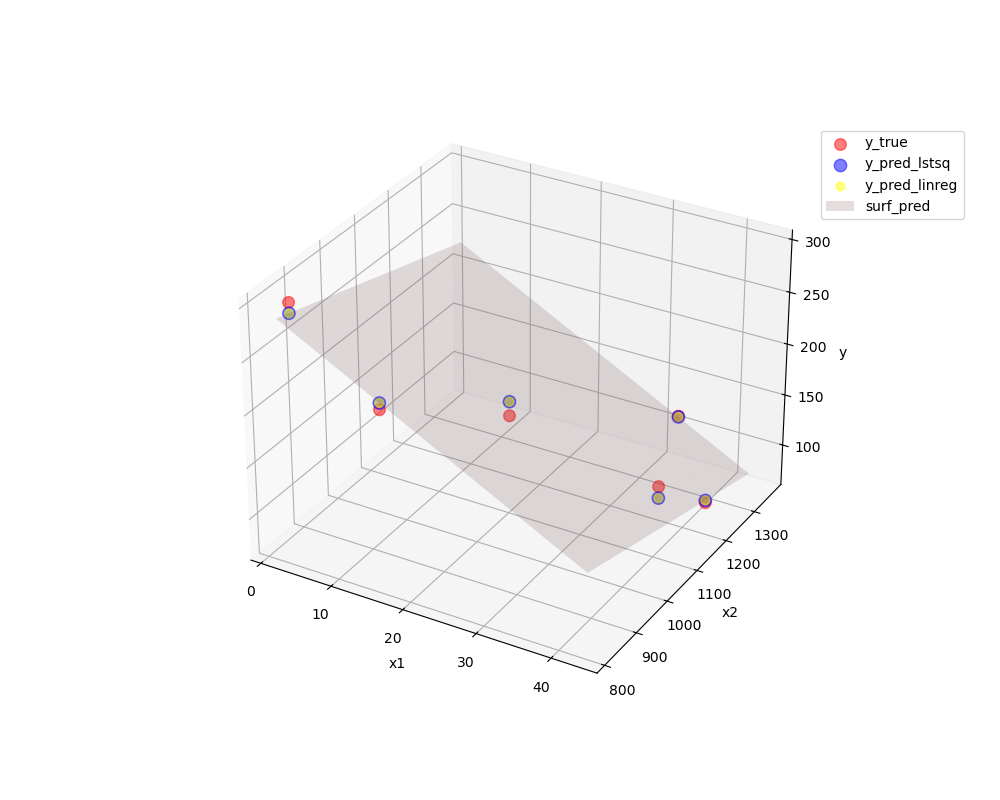

In [14]:
fig = plt.figure(figsize=(10, 8))
ax1 = plt.subplot(1, 1, 1, projection='3d')
ax1.set_xlabel('x1')
ax1.set_ylabel('x2')
ax1.set_zlabel('y')
ax1.scatter(xs=X[:, 0], ys=X[:, 1], zs=y, color='red', label='y_true', s=70, alpha=0.5)
ax1.scatter(xs=X[:, 0], ys=X[:, 1], zs=y_pred_lstsq, color='blue', label='y_pred_lstsq', s=80, alpha=0.5)
ax1.scatter(xs=X[:, 0], ys=X[:, 1], zs=y_pred_linreg, color='yellow', label='y_pred_linreg', s=40, alpha=0.5)
ax1.plot_surface(x1_mesh, x2_mesh, y_mesh, color='pink', alpha=0.2, label='surf_pred')
ax1.legend(loc=(1, 0.8));

In [15]:
linear_reg.predict([[25, 1000]])

array([181.16725241])

In [16]:
X_new = np.hstack([X, (X[:, 0]*X[:, 1]).reshape(-1, 1), np.ones((X.shape[0], 1))])
X_new

array([[1.6000e+00, 8.5100e+02, 1.3616e+03, 1.0000e+00],
       [1.5500e+01, 8.1600e+02, 1.2648e+04, 1.0000e+00],
       [2.2000e+01, 1.0580e+03, 2.3276e+04, 1.0000e+00],
       [4.3000e+01, 1.2010e+03, 5.1643e+04, 1.0000e+00],
       [3.3000e+01, 1.3570e+03, 4.4781e+04, 1.0000e+00],
       [4.0000e+01, 1.1150e+03, 4.4600e+04, 1.0000e+00]])

In [17]:
a_3, b_3, c_3, d_3 = np.linalg.lstsq(X_new, y, rcond=None)[0]

coefs = np.vstack([a_3, b_3, c_3, d_3])
y_pred_lstsq2 = X_new @ coefs

In [18]:
r2_score(y, y_pred_lstsq2)

0.9902802562911494

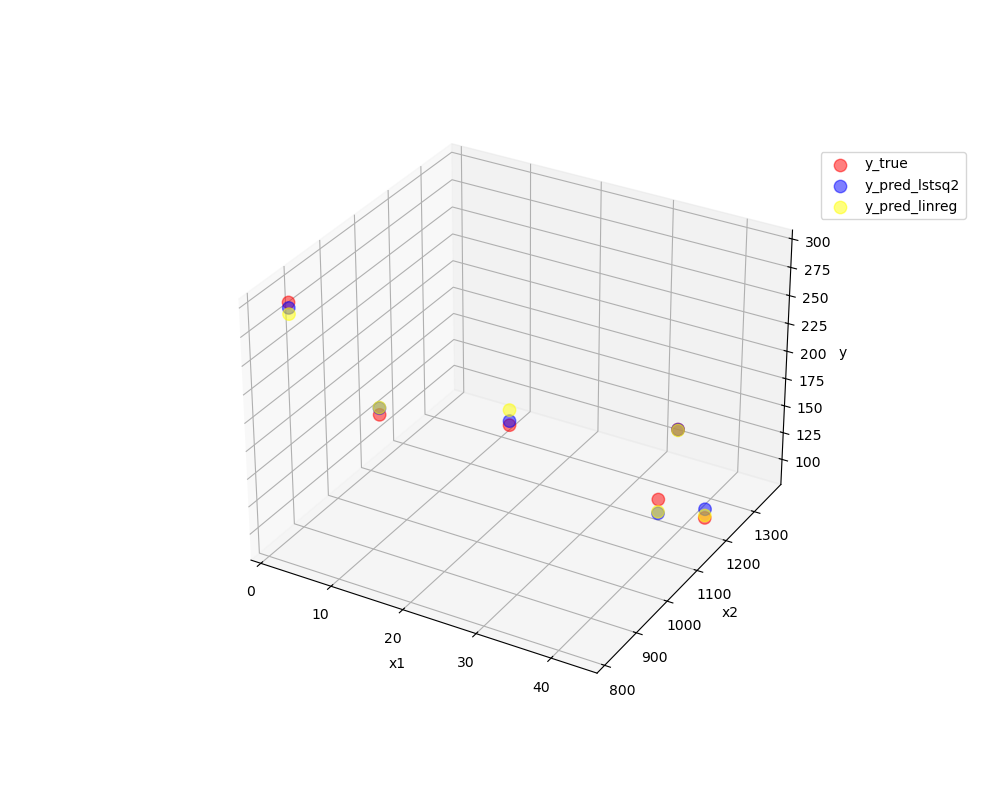

In [21]:
fig = plt.figure(figsize=(10, 8))
ax1 = plt.subplot(1, 1, 1, projection='3d')
ax1.set_xlabel('x1')
ax1.set_ylabel('x2')
ax1.set_zlabel('y')
ax1.scatter(xs=X[:, 0], ys=X[:, 1], zs=y, color='red', label='y_true', s=80, alpha=0.5)
ax1.scatter(xs=X[:, 0], ys=X[:, 1], zs=y_pred_lstsq2, color='blue', label='y_pred_lstsq2', s=80, alpha=0.5)
ax1.scatter(xs=X[:, 0], ys=X[:, 1], zs=y_pred_linreg, color='yellow', label='y_pred_linreg', s=80, alpha=0.5)
ax1.legend(loc=(1, 0.8));

In [20]:
[[25, 1000, 25000, 1]] @ coefs

array([[172.62448635]])